# Read Data

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
A = pd.read_csv("C:/Dataset/Dataset/AirPassengers.csv")

# Preview of a Dataset

In [2]:
A.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Date conversion

In [3]:
A.Month = pd.to_datetime(A.Month)

In [4]:
A.columns = ["Month","NoPass"]

In [5]:
A.head(3)

,Month,NoPass
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132


In [6]:
A.index = A.Month

In [7]:
A = A.drop(columns=["Month"],axis=1)

In [8]:
A.head(3)

,NoPass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


# Plot time series

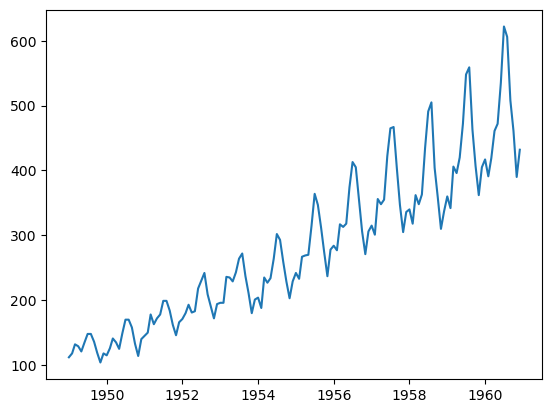

In [9]:
import matplotlib.pyplot as plt
plt.plot(A)

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(A)

In [11]:
A

,NoPass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<AxesSubplot:xlabel='Month'>

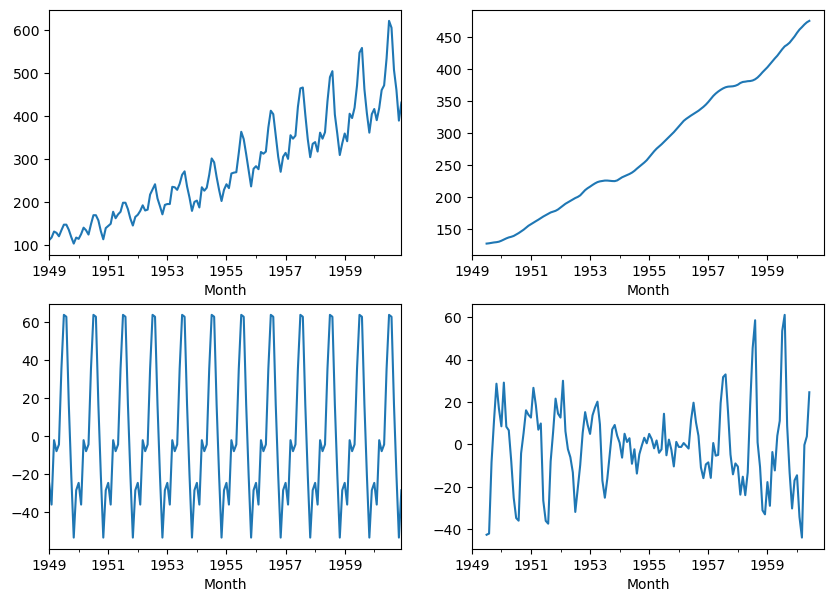

In [12]:
T = seasonal_decompose(A)
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
T.observed.plot()
plt.subplot(2,2,2)
T.trend.plot()
plt.subplot(2,2,3)
T.seasonal.plot()
plt.subplot(2,2,4)
T.resid.plot()

# Visualise the components of time-series

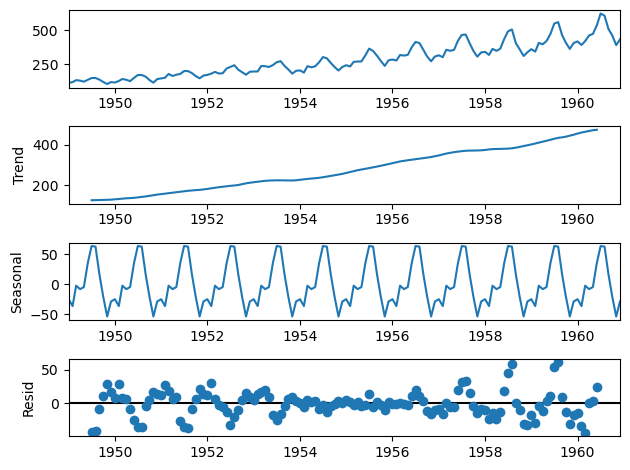

In [13]:
from statsmodels.api import tsa
tsa.seasonal_decompose(A).plot()
plt.show()

# Rolling Mean

In [20]:
import numpy as np
log_pass = np.log(A[["NoPass"]])
rm = log_pass.rolling(window=12).mean()
A['diff']=log_pass-rm

In [21]:
B = A[A['diff'].isnull()==False]

In [22]:
B.head(8)

,NoPass,diff
Month,,
1949-12-01,118,-0.065494
1950-01-01,115,-0.093449
1950-02-01,126,-0.007566
1950-03-01,141,0.099416
1950-04-01,135,0.052142
1950-05-01,125,-0.027529
1950-06-01,149,0.139881
1950-07-01,170,0.260184


In [23]:
B=B.drop(labels=["NoPass"],axis=1)
B.columns=["Pass"]
B.head() #Pass contains Rolling mean valus

,Pass
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


# check whether data has been converted to stationary using rolling mean

In [24]:
from statsmodels.tsa.stattools import adfuller
x = adfuller(pd.Series(B['Pass']))
if(x[1]<0.05):
    print("Stationary")
else:
    print("Not Stationary")

Stationary


In [26]:
from statsmodels.tsa.stattools import adfuller
x = adfuller(pd.Series(A['NoPass']))
if(x[1]<0.05):
    print("Stationary")
else:
    print("Not Stationary")

Not Stationary


# Forecasting Using AR

In [27]:
trd = B[B.index.year<=1958] #Training Dataset
tsd = B[B.index.year>1958]  #Testing Dataset

In [28]:
trd

,Pass
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1958-08-01,0.298412
1958-09-01,0.075268
1958-10-01,-0.045657


In [29]:
tsd

,Pass
Month,
1959-01-01,-0.049241
1959-02-01,-0.106598
1959-03-01,0.055385
1959-04-01,0.019679
1959-05-01,0.066365
1959-06-01,0.176286
1959-07-01,0.316430
1959-08-01,0.327838
1959-09-01,0.128057


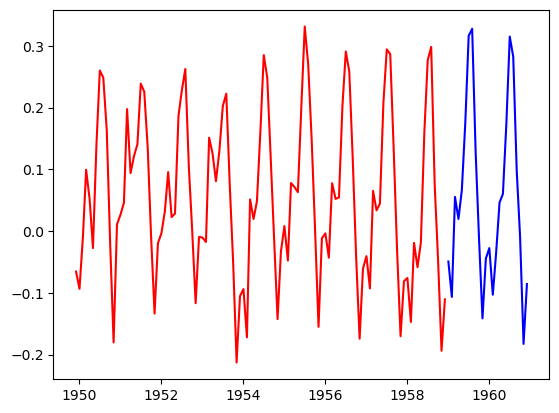

In [30]:
plt.plot(trd,c="red")
plt.plot(tsd,c="blue")